PART 2 - Brach. test

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
titanic_data.columns = pd.Series(titanic_data.columns).apply(lambda r: r.lower())
titanic_data.sex = titanic_data.sex.map({'female': 0, 'male': 1})
titanic_data.head(2)#[-2::]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
test.columns = pd.Series(test.columns).apply(lambda r: r.lower())
test.sex = test.sex.map({'female': 0, 'male': 1})
test['survived']=[-1]*len(test)

cols=list(test)
cols.insert(0,cols.pop(cols.index('survived')))
test=test.loc[:,cols]

test.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
892,-1,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S


In [4]:
raw=pd.concat([titanic_data,test],) #соединим тренировочную и тестовую

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
survived    1309 non-null int64
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null int64
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


In [6]:
raw.age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [7]:
age_table=raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='mean')
age_table # распределение возраста по классам отличается. Заполним потом пустые значения используя таблицу

survived           -1          0          1
sex pclass                                 
0   1       41.333333  25.666667  34.939024
    2       24.376552  36.000000  28.080882
    3       23.073400  23.818182  19.329787
1   1       40.520000  44.581967  36.248000
    2       30.940678  33.369048  16.022000
    3       24.525104  27.255814  22.274211

In [8]:
raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='count')
# быть женщиной это плюс. класс имеет значение

survived    -1    0   1
sex pclass             
0   1       48    3  82
    2       29    6  68
    3       50   55  47
1   1       50   61  40
    2       59   84  15
    3       96  215  38

<Container object of 65 artists>

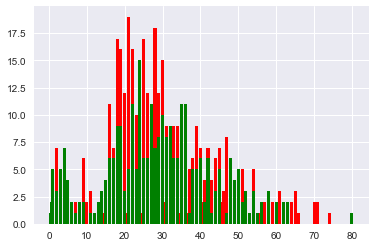

In [9]:
f1=raw[raw.survived==1].groupby(['age']).name.count()
f2=raw[raw.survived==0].groupby(['age']).name.count()
#pd.DataFrame(f1)

plt.bar(f2.index,f2,color='red')
plt.bar(f1.index,f1,color='green')


In [10]:
print "Miss mean age: {}".format(raw[raw.name.str.contains('Miss')].age.mean())
print "Master mean age: {}".format(raw[raw.name.str.contains('Master')].age.mean())
print "Mrs mean age: {}".format(raw[raw.name.str.contains('Mrs.')].age.mean())
print "Mr mean age: {}".format(raw[raw.name.str.contains('Mr.')].age.mean())
miss_age =raw[raw.name.str.contains('Miss')].age.mean()
master_age = raw[raw.name.str.contains('Master')].age.mean()

Miss mean age: 21.7742380952
Master mean age: 5.48264150943
Mrs mean age: 36.8045977011
Mr mean age: 33.3220899471


In [11]:
#столбец с титулом. Он, конечно, коррелирует с возрастом, но тем не менее
raw.loc[raw.name.str.contains('Miss.'),'title']='miss'
raw.loc[raw.name.str.contains('Mr.'),'title']='mr'
raw.loc[raw.name.str.contains('Mrs.'),'title']='mrs'
raw.loc[raw.name.str.contains('Master'),'title']='master'
raw.loc[raw.name.str.contains('Dr.'),'title']='dr'
raw.loc[raw.name.str.contains('Don.'),'title']='don'
raw.loc[raw.name.str.contains('Master'),'title']='master'
raw.loc[raw.name.str.contains('Ms.'),'title']='ms'
raw.loc[raw.name.str.contains('Rev.'),'title']='rev'
raw.loc[raw.title.isnull(),'title']='other'

In [12]:
raw['deck']=raw.cabin.str[0]
raw.loc[raw.deck.isnull(),'deck']='na'

In [13]:
raw.loc[raw.fare==0,'nofare']=1
raw.nofare=raw.nofare.fillna(0)
#отметим тех, кто ехал бесплатно

In [14]:
raw.age=raw.age.fillna(-1)
raw.cabin = raw.cabin.fillna('na')
raw.embarked= raw.embarked.fillna('S') # больше всего
raw.fare = raw.fare.fillna(raw.fare.mean())

In [15]:
#заполним отсутствующи возраст для miss и master. для остальных используем данные из таблицы выше
na_index =raw[raw.age==-1].index 
for ind in na_index:
    if raw.loc[ind].title=='miss':
        raw.loc[ind,'age']=miss_age
    elif raw.loc[ind].title=='master':
        raw.loc[ind,'age']=master_age
    else:
        raw.loc[ind,'age']=age_table[raw.loc[ind].survived][raw.loc[ind].sex][raw.loc[ind].pclass]

In [16]:
#добавим квадратичные признаки
raw['agesqr']=raw.age**2
raw['sibsqr']=raw.sibsp**2
raw['parsqr']=raw.parch**2
raw['pclasssqr']=raw.pclass**2

In [17]:
#первая буква в номере каты означает палубу. Это имеет значение
tmp =raw.loc[:,['survived','cabin']]
tmp['cab']=tmp.cabin.str[0]
tmp.pivot_table(index=['cab'],columns='survived', values='cabin',aggfunc='count')

survived,-1,0,1
cab,,,
A,7.0,8.0,7.0
B,18.0,12.0,35.0
C,35.0,24.0,35.0
D,13.0,8.0,25.0
E,9.0,8.0,24.0
F,8.0,5.0,8.0
G,1.0,2.0,2.0
T,NaN,1.0,NaN
n,327.0,481.0,206.0


In [18]:
train_ind = list(raw[raw.survived!=-1].index)
test_ind = list(raw[raw.survived==-1].index)

In [19]:
num_col = ['pclass','sex', 'age','sibsp', 'parch','fare','agesqr','sibsqr','parsqr','nofare','pclasssqr']
cat_col = ['embarked','title','deck']
y=raw[raw.survived!=-1]['survived']

In [20]:
raw.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,deck,nofare,agesqr,sibsqr,parsqr,pclasssqr
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,na,S,mr,na,0.0,484.0,1,0,9
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,mrs,C,0.0,1444.0,1,0,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,na,S,miss,na,0.0,676.0,0,0,9


In [21]:
#преобразуем категориальные признаки
new_cat_cols=[]
for c in cat_col:
    for d in raw[c].unique():
        raw.loc[raw[c]==d,c+'_'+d]=1
        raw[c+'_'+d]=raw[c+'_'+d].fillna(0)
        new_cat_cols.append(c+'_'+d)
        
all_cols = num_col+new_cat_cols

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

C:\Users\Dima\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dima\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
#посмотрим, какие элемены будут весить в линейной модели. Откинем шумовые признаки
LR=LogisticRegression(class_weight='balanced',fit_intercept=False, penalty='l1')
LR.fit(raw.loc[train_ind,all_cols],y)

co=pd.DataFrame(LR.coef_)
co.columns=all_cols
co=co.T
all_cols=co[abs(co[0])>0.015].index
co.sort_values(0)#

,0
sex,-1.437340
pclasssqr,-0.400448
deck_na,-0.346435
nofare,-0.344860
sibsqr,-0.169439
parsqr,-0.073442
parch,-0.063513
title_rev,-0.062907
age,-0.012425
agesqr,-0.000195


In [24]:
print all_cols 

Index([u'pclass', u'sex', u'parch', u'sibsqr', u'parsqr', u'nofare',
       u'pclasssqr', u'embarked_S', u'embarked_C', u'embarked_Q', u'title_mrs',
       u'title_miss', u'title_master', u'title_dr', u'title_rev',
       u'title_other', u'deck_na', u'deck_E', u'deck_D', u'deck_A', u'deck_B'],
      dtype='object')


In [25]:
#запустим классификаторы. Используем кросс-валидацию и подбор параметров по сетке. Ну и выполним масштабирование признаков

cv=StratifiedKFold(y,n_folds=3,shuffle=True,random_state=1)
LR = LogisticRegression(class_weight='balanced',fit_intercept=False, penalty='l2')
RF = RandomForestClassifier(n_estimators=70,max_depth=15)
XGB = XGBClassifier()

train_data = raw.loc[train_ind,all_cols]
test_data = raw.loc[test_ind,all_cols]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data,y)
test_data_scaled = scaler.transform(test_data)

train_data = train_data_scaled
test_data=test_data_scaled

estimator=LR
scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
LR_best =LR
LR.fit(train_data,y)
print 'LR: {} / {}'.format(scores.mean(),scores.std())

estimator=RF

scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
print 'simple RF: {} / {}'.format(scores.mean(),scores.std())
RF=RandomForestClassifier()
RF_params=[{
    "n_estimators":[20,30,50,70],
    "min_samples_split":[4,8,10],
    "max_depth":[10,15,20],
    "min_samples_leaf":[2,3,4]
}]
RF_grid=GridSearchCV(RF,RF_params,cv=3,refit=True,verbose=1,n_jobs=-1)
RF_grid.fit(train_data,y)
RF_best = RF_grid.best_estimator_
print 'RF: {}, params:{} '.format(RF_grid.best_score_,RF_grid.best_params_)


estimator=XGB
scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
print 'Simple XGB: {} / {}'.format(scores.mean(),scores.std())

XGB_params = [{
    "n_estimators":[150,200,250],
    "max_depth":[2,3,4,5],
    "learning_rate":[0.01,0.02,0.05]
}]
XGB_grid = GridSearchCV(XGB,XGB_params,cv=3,refit=True, verbose=1,n_jobs=1)
XGB_grid.fit(train_data,y)
XGB_best = XGB_grid.best_estimator_
print 'XGB: {}, params:{} '.format(XGB_grid.best_score_,XGB_grid.best_params_)

print '---------------done-----------------'

LR: 0.79797979798 / 0.00549829347426
simple RF: 0.809203142536 / 0.00793610304362
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   55.0s finished


RF: 0.819304152637, params:{'min_samples_split': 8, 'n_estimators': 50, 'max_depth': 15, 'min_samples_leaf': 2} 
Simple XGB: 0.818181818182 / 0.0145471171681
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   43.2s finished


XGB: 0.829405162738, params:{'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 3} 
---------------done-----------------


In [ ]:
test_data=test_data_scaled

answers = pd.DataFrame(LR_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
#answers.head(4)
answers.to_csv('answer_LR.csv')

answers = pd.DataFrame(RF_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
answers.to_csv('answer_rf.csv')

answers = pd.DataFrame(XGB_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
answers.to_csv('answer_XGB.csv')